Comme nous verrons plus tard, la première bande de conduction a un index k-point de 95 et cela correspond donc bien à la branche B-Z et pas celui de la branche P1-Z

Nous avons donc une bande interdite indirecte reportée sur l'image ci-dessous. 
Avec une énergie de 0.6836eV


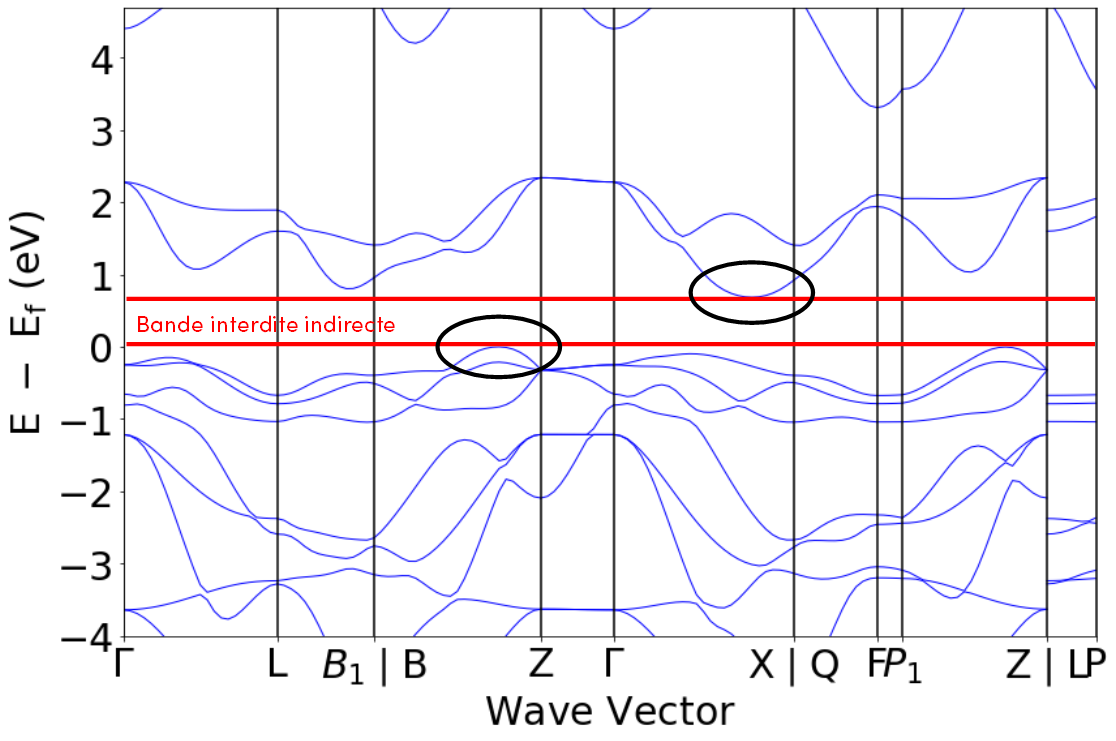

In [143]:
from pymatgen.ext.matproj import MPRester
from pymatgen.core.operations import SymmOp
from pprint import pprint
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen import Spin
from IPython.display import Image


import matplotlib.pyplot as plt

from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.analysis.diffraction import xrd
import numpy as np

with MPRester("UTLDwneEpLqJ3EtR") as m:
    bandStructure = m.get_bandstructure_by_material_id("mp-757100")


bandsPlot = BSPlotter(bandStructure)
#bandsPlot.show()

bandGap = bandStructure.get_band_gap()
print("Comme nous verrons plus tard, la première bande de conduction a un index k-point de 95 et cela correspond donc bien à la branche B-Z et pas celui de la branche P1-Z")
print()
print("Nous avons donc une bande interdite "+ ("directe" if (bandGap['direct']) else "indirecte") +" reportée sur l'image ci-dessous. ")
print("Avec une énergie de " + str(round(bandGap['energy'], 4)) + "eV")
Image('band_gap.png')

In [168]:


valenceBand = bandStructure.get_vbm()
print("Pour la bande de valence nous avons : ")
print(valenceBand)
print("---")
conductionBand = bandStructure.get_cbm()
print("Pour la bande de conduction nous avons : ")
print(conductionBand)
print("---")
print("Les deux vbm et cdm sont respectivement les bandes 11 et 12.")

print("Les bandes " + ("sont polarisées" if (bandStructure.is_spin_polarized) else "ne sont pas polarisées") + ". Toutes les valeurs se trouvent donc dans le tableau Spin.up. ")
print("---")


kk = list()
for kpoint in bandStructure.kpoints:
    kk.append(sum(kpoint.frac_coords *  kpoint.frac_coords))


Pour la bande de valence nous avons : 
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [11]}), 'kpoint_index': [56], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f82dc2f1518>, 'energy': 3.9385, 'projections': {}}
---
Pour la bande de conduction nous avons : 
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [12]}), 'kpoint_index': [95], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f82dc316128>, 'energy': 4.6221, 'projections': {}}
---
Les deux vbm et cdm sont respectivement les bandes 11 et 12.
Les bandes ne sont pas polarisées. Toutes les valeurs se trouvent donc dans le tableau Spin.up. 
---


Les dispersions sont indiquées sur la figure ci-dessous.


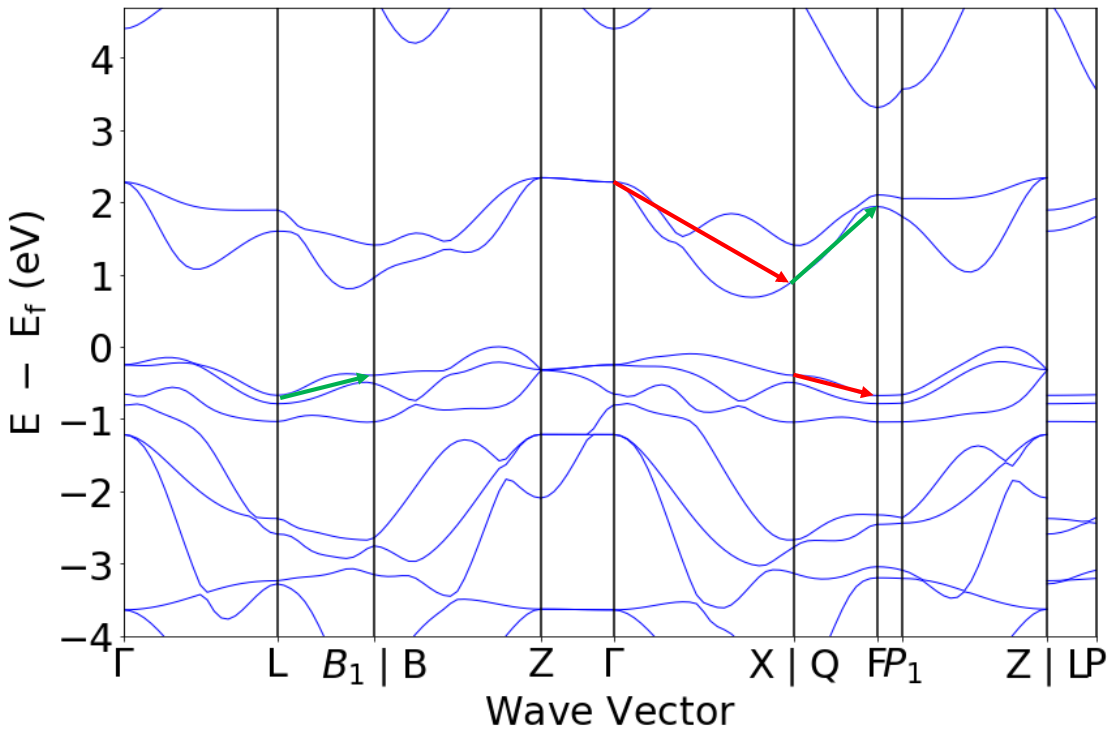

In [145]:
#valeurs bande de valence
valenceBandValues = bandStructure.bands[Spin.up][11, :]
conductionBandValues = bandStructure.bands[Spin.up][12, :]

k = list()
dispersionsC = list()
dispersionsV = list()

dispersionsC.append(conductionBandValues[0])
dispersionsV.append(valenceBandValues[0])

k.append(0)

i = 1
end_index = bandStructure.get_branch(-1)[0]['start_index'] - 1 #on ignore la dernière branchee
while i < end_index: 
    branch = bandStructure.get_branch(i)
    i = branch[0]['end_index'] + 2
    
    #append end of branch
    dispersionsC.append(conductionBandValues[i-2]) #conduction band
    dispersionsV.append(valenceBandValues[i-2]) #valence band

    k.append(i-2)
    
    #append start of new branch
    if(i < end_index):
        dispersionsC.append(conductionBandValues[i-1]) #conduction band
        dispersionsV.append(valenceBandValues[i-1]) #valence band

        k.append(i-1)



print("Les dispersions sont indiquées sur la figure ci-dessous.")

Image('dispersions.png')

In [149]:
#calcul des pentes sur les branches
dConduction = [(e-ee)/(k-kk) for ee, e,kk, k in zip(dispersionsC[:-1], dispersionsC[1:], k[:-1], k[1:])]
dValence= [(e-ee)/(k-kk) for ee, e,kk, k in zip(dispersionsV[:-1], dispersionsV[1:], k[:-1], k[1:])]


print("BANDE DE CONDUCTION")
print("")
#maximum 
maxConduction = max(dConduction)
maxConductionIndex = k[dConduction.index(maxConduction)]
maxConductionBranch = bandStructure.get_branch(maxConductionIndex+1)
#minimum
minConduction = min(dConduction)
minConductionIndex = k[dConduction.index(minConduction)]
minConductionBranch = bandStructure.get_branch(minConductionIndex+1)

print("Dispersion maximale de " + str(round(maxConduction,5)) + "eV")
print("Qui se trouve dans la branche " + str(maxConductionBranch[0]['name']) + ": " + str(maxConductionBranch))
print("")
print("Dispersion minimale de " + str(round(minConduction,5)) + "eV")
print("Qui se trouve dans la branche " + str(minConductionBranch[0]['name']) + ": " + str(minConductionBranch))
print("")
print("-------------------------------")

print("BANDE DE VALENCE")
print("")
#maximum
maxValence = max(dValence)
maxValenceIndex = k[dValence.index(maxValence)]
maxValenceBranch = bandStructure.get_branch(maxValenceIndex+1)
#minimum
minValence = min(dValence)
minValenceIndex = k[dValence.index(minValence)]
minValenceBranch = bandStructure.get_branch(minValenceIndex+1)
print("Dispersion maximale de " + str(round(maxValence,5)) + "eV")
print("Qui se trouve dans la branche " + str(maxValenceBranch[0]['name']) + ": " + str(maxValenceBranch))
print("")
print("Dispersion minimale de " + str(round(minValence,5)) + "eV")
print("Qui se trouve dans la branche " + str(minValenceBranch[0]['name']) + ": " + str(minValenceBranch))
print("")

BANDE DE CONDUCTION

Dispersion maximale de 0.08522eV
Qui se trouve dans la branche Q-F: [{'name': 'Q-F', 'start_index': 102, 'end_index': 114, 'index': 103}]

Dispersion minimale de -0.0524eV
Qui se trouve dans la branche \Gamma-X: [{'name': '\\Gamma-X', 'start_index': 75, 'end_index': 101, 'index': 76}]

-------------------------------
BANDE DE VALENCE

Dispersion maximale de 0.01983eV
Qui se trouve dans la branche L-B_1: [{'name': 'L-B_1', 'start_index': 23, 'end_index': 37, 'index': 24}]

Dispersion minimale de -0.02324eV
Qui se trouve dans la branche Q-F: [{'name': 'Q-F', 'start_index': 102, 'end_index': 114, 'index': 103}]



--------------------------------
La masse effective se calcule via la formule

$$ m_e^* = \frac{\hbar^2}{\frac{\partial^2E}{\partial x^2}} $$

Il nous faut donc trouver l'expression de l'énergie E. On suppose une dispersion parabolique qui aura donc la forme : 
$ y = ax^2 + bx + c$. Vu que nous prenons la dérivée seconde par rapport au vecteur $x$, seul le coefficient $a$ nous importe ici.

In [205]:

index = np.where(conductionBandValues == min(conductionBandValues))[0][0]
x = list()
x.append(conductionBandValues[index])
x.append(conductionBandValues[index-5])
x.append(conductionBandValues[index+5])
y = list()
y.append(kk[index])
y.append(kk[index-5])
y.append(kk[index+5])

z = np.polyfit(x,y,2)
a = z[0] # en eV/A^2
a = a * 1.602181 * 10**(-19) / (10 ** (-10))**2 #J/m

hbar = 6.62610 * 10 ** -34

mconduction = hbar**2/a
print("masse effective dernière bande de valence = " + str(mconduction) + " kg")




147.3656985737695
masse effectivre = 1.8595505444352926e-70 kg


In [209]:

index = np.where(valenceBandValues == max(valenceBandValues))[0][0]
x = list()
x.append(valenceBandValues[index])
x.append(valenceBandValues[index-5])
x.append(valenceBandValues[index+5])
y = list()
y.append(kk[index])
y.append(kk[index-5])
y.append(kk[index+5])

z = np.polyfit(x,y,2)
a = z[0] # en eV/A^2
a = a * 1.602181 * 10**(-19) / (10 ** (-10))**2 #J/m

hbar = 6.62610 * 10 ** -34

mconduction = hbar**2/a
print("masse effective première bande de conduction = " + str(mconduction) + " kg")

masse effective première bande de conduction = -6.819459100299443e-69 kg
